โหลดข้อมูลที่ผ่านการทำความสะอาดแล้ว เพื่อใช้ในการวิเคราะห์เชิงสำรวจ (EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"..\data\cleaned\social_media_addiction_cleaned.csv")
df.head()


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Usage_Level,Addiction_Level
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,High,High
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,Medium,Low
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,High,High
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,Medium,Moderate
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,Medium,High


In [2]:
df.shape
df.describe()


,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


[2] ตรวจสอบข้อมูลทั้งหมด และดูค่าสถิติเบื้องต้น อย่างค่าเฉลี่ย ค่าส่ำสุด สูงสุด เพื่อจะได้ทำความเข้าใจลักษณะโดยรวมของข้อมูล

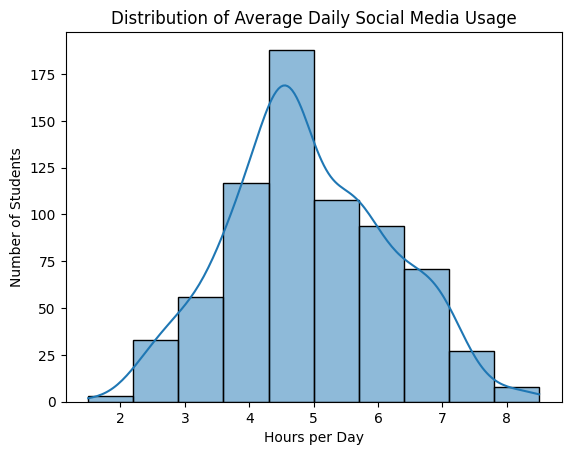

In [6]:
plt.figure()
sns.histplot(df["Avg_Daily_Usage_Hours"], bins=10, kde=True)
plt.title("Distribution of Average Daily Social Media Usage")
plt.xlabel("Hours per Day")
plt.ylabel("Number of Students")
plt.show()



[6] เช็คเวลาการกระจายการใช้โซเชียลมีเดียต่อวัน จากกราฟ นักศึกษาส่วนใหญ่ใช้โซเชียล ประมาณกลางๆ 2-5 ชั่วโมง/วัน แต่มีกลุ่มที่ใช้สูงมากอยู่

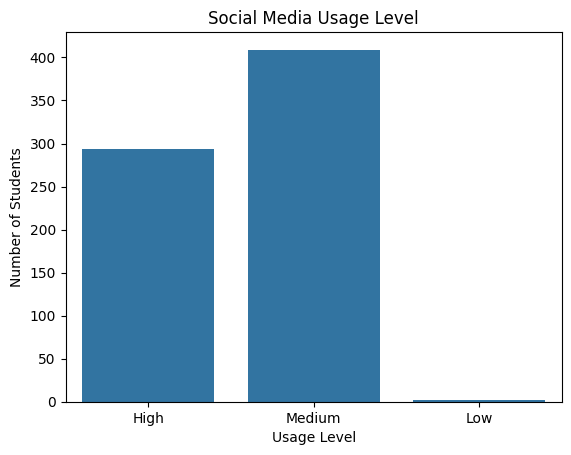

In [7]:
plt.figure()
sns.countplot(data=df, x="Usage_Level")
plt.title("Social Media Usage Level")
plt.xlabel("Usage Level")
plt.ylabel("Number of Students")
plt.show()


[7] ดูระดับการใช้งาน มีการใช้งานระดับกลาง และ สูง ที่สูงมาก การฟแสดงให้เห็นว่าโซเชีีียล เป็นส่วนหนุ่งของชีวิตประจำวันไปแล้ว

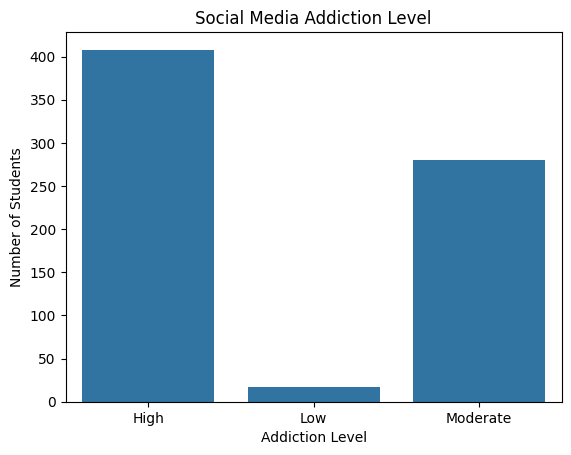

In [8]:
plt.figure()
sns.countplot(data=df, x="Addiction_Level")
plt.title("Social Media Addiction Level")
plt.xlabel("Addiction Level")
plt.ylabel("Number of Students")
plt.show()


จากการฟ เช็คระดับการเสพติดโซเชียล ผู้ใช้ส่วนใหญ่อยู่ในระดับ กลางถึง สูงมาก ควรได้รับความสนใจ

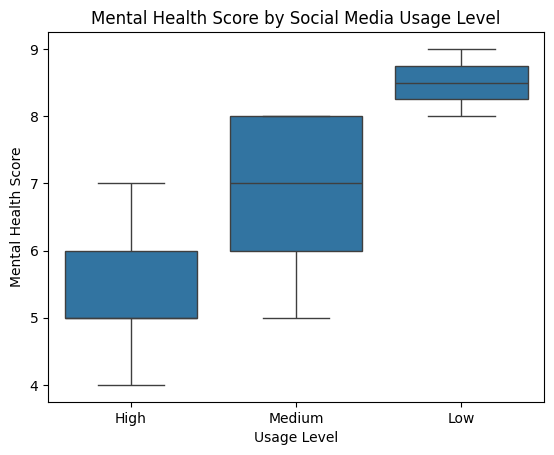

In [9]:
plt.figure()
sns.boxplot(data=df, x="Usage_Level", y="Mental_Health_Score")
plt.title("Mental Health Score by Social Media Usage Level")
plt.xlabel("Usage Level")
plt.ylabel("Mental Health Score")
plt.show()


[9] กลุ่มที่ใช้โซเชียลระดับสูงมีแนวโน้มคะแนนสุขภาพจิตต่ำกว่า
บ่งชี้ถึงความสัมพันธ์เชิงลบระหว่างการใช้งานที่มากเกินไปกับสุขภาพตจิต

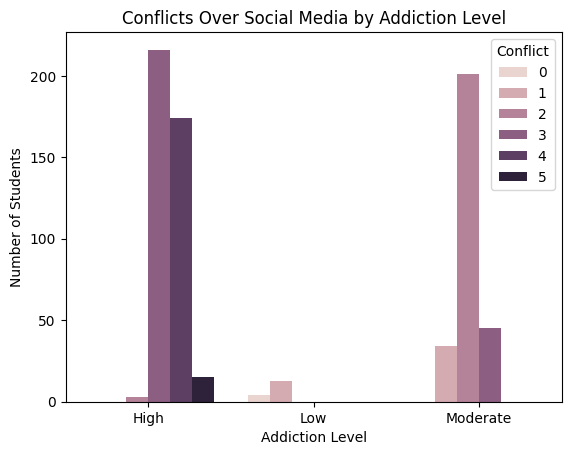

In [10]:
plt.figure()
sns.countplot(
    data=df,
    x="Addiction_Level",
    hue="Conflicts_Over_Social_Media"
)
plt.title("Conflicts Over Social Media by Addiction Level")
plt.xlabel("Addiction Level")
plt.ylabel("Number of Students")
plt.legend(title="Conflict")
plt.show()


[10] ระดับการเสพติดสูง มีผลต่อความสัมพันธ์กับการเกิดความขัดแย้งในความสัมพันธ์มากขึ้น แสดงให้เห็นผลกระทบทางสังคมจากการใช้และเกิดการติดโซเชียล

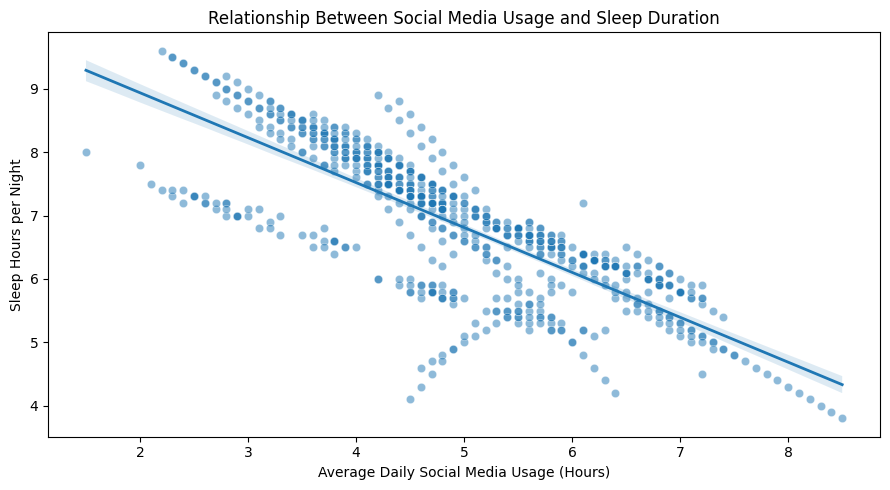

In [17]:
plt.figure(figsize=(9,5))

sns.scatterplot(
    data=df,
    x="Avg_Daily_Usage_Hours",
    y="Sleep_Hours_Per_Night",
    alpha=0.5
)

sns.regplot(
    data=df,
    x="Avg_Daily_Usage_Hours",
    y="Sleep_Hours_Per_Night",
    scatter=False,
    line_kws={"linewidth":2}
)

plt.title("Relationship Between Social Media Usage and Sleep Duration")
plt.xlabel("Average Daily Social Media Usage (Hours)")
plt.ylabel("Sleep Hours per Night")

plt.tight_layout()
plt.show()




[11] มีแนวโน้มการใช้งานที่มากขึ้น สัมพีนธ์กับชั่วโมงการนอนที่ลดลง

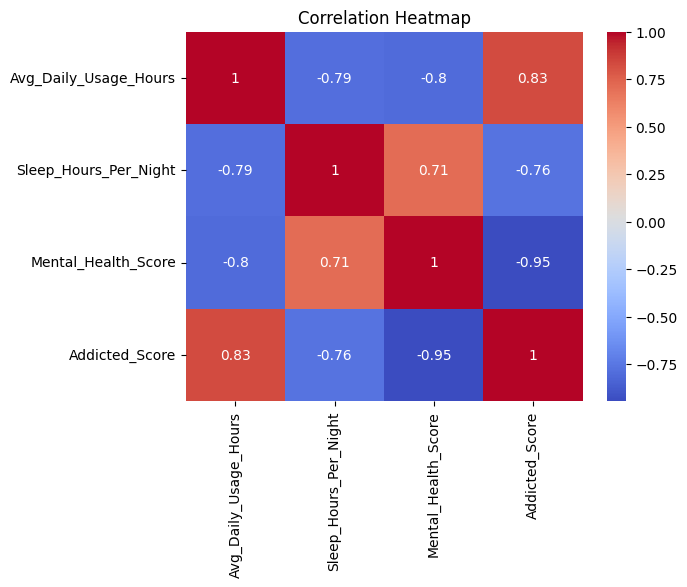

In [12]:
plt.figure()
sns.heatmap(
    df[[
        "Avg_Daily_Usage_Hours",
        "Sleep_Hours_Per_Night",
        "Mental_Health_Score",
        "Addicted_Score"
    ]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Heatmap")
plt.show()


[12] เวลาในการใช้โซเชียล มีความสัมพันธ์เชิงลบกับการนอนและสุขภาพจิต และคะแนนการเสพติดโซเชียล สัมพันธ์กับการได้รับผลกระทบด้านลบหลายด้าน

Summary
- นักศึกษาที่ใช้โซเชียลเป็นเวลานานมีแนวโน้มสุขภาพจิตต่ำลง
- ระดับการเสพติดโซเชียลที่สูงสัมพีนธ์กับความขัดแย้งในความสัมพันธ์ของนักศึกษา
- การใช้งานมากเกินไปส่งผลต่อการนอนและคุณภาพชีวิตระยะยาวได้
